# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [175]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab
import math
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

To verify this question, we can simply plot the histogram of human body temperature, and compare the distribution to the normal distribution. 

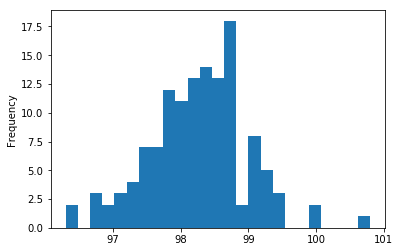

In [176]:
# Plot histogram of the temperature
df.temperature.plot.hist(bins = 25);

From the histogram, we can see that the distribution is slightly skewed toward left and compiled in the middle. We can examine the Skewness and the Kurtosis to verify this observation quantitatively:

In [177]:
test = df.temperature.as_matrix()
stats.describe(test)

DescribeResult(nobs=130, minmax=(96.299999999999997, 100.8), mean=98.249230769230749, variance=0.53755754323196159, skewness=-0.004367976879081625, kurtosis=0.7049597854114693)

Compare our the data skewness and kurtosis to that of normal distribution:

In [178]:
stats.norm.stats(moments = 'sk')

(array(0.0), array(0.0))

By the information above, we can confirm that the distribution of sample is a bit different from normal distribution. But what is our confidence level to reject the null hypothesis? There's a build-in function from scipy, scipy.stats.mstats.normaltest, can conduct normality test to the samples, which will give us p-value for rejecting the null hypothesis – the true population is normaly distributed.

In [179]:
stats.mstats.normaltest(test)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

This normality test use chi-square test. The p-value is 0.26, which means, if we need at least 90% confidence level to reject the null hypothesis, we can not reject the null hypothesis in this case, since the p-value is 0.26, which means there's a 26% chance that the true population is normaly distributed.

# 2. Is the sample size large? Are the observations independent?

## a. Is the sample size large enough?

To answer this question, let's first calculate the sample size.

In [180]:
sampleSize = len(df)
sampleSize

130

Under general rule of hypothesis testing, when sample size is greater than 30, we can conduct $z$-statistic to test the hypothesis, otherwise we need to use $t$-statistic. In our case, the sample size is 150, therefore, our sample size is large enough to use $z$-statistic.

## b. Are the observations independent?

There are several ways to examine whether the observations are independent to eacher other. We can first start with ploting out the temperature according to the order of the data. If there's an obvious trends between the temperature and the order of the examination, it could imply that there might be dependence between the measurements.

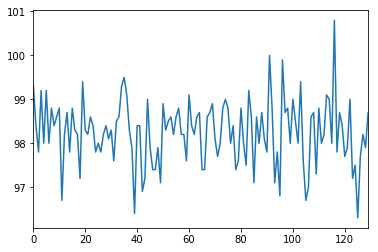

In [181]:
df.temperature.plot();

By looking at the plot above, it seems there's no obvious trend between the samples.
Secondly, we can see the Quantile - quantile plot:

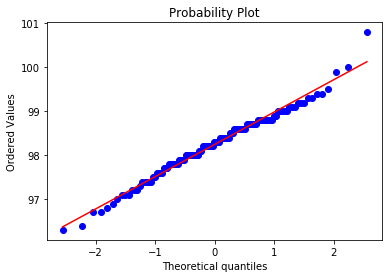

In [182]:
stats.probplot(measurements, dist="norm", plot=pylab);

Since the data are accorespondant to the quantile - quantile plot, we can be more confident to say that the samples are independent to each other.

# 3. Is the true population mean really 98.6$^{\circ}$F?

## a. Would you use a one-sample or two-sample test? Why?

I will simply use one-sample test to test the hypothesis. 
The reasons are the following:
The goal of this test is to decide whether to accept or reject the null hypothesis – true population mean is 98.6$^{\circ}$F. Since two-sample test is used to compare the means of two different samples, and one-sample test is used to compare the mean of the samples to the known value, in this case 98.6$^{\circ}$F, We should use one-sample test in this case.

## b. In this situation, is it appropriate to use the  $t$  or  $z$  statistic?

As mentioned previously, since the sample size is much larger than 150, we should use $z$-statistic to conduct the test.

In [183]:
mean = test.mean()
stdErr = test.std() / math.sqrt(len(test))
print ('Sample mean: ', round(mean, 2), 'standard error: ', round(stdErr,2))

Sample mean:  98.25 standard error:  0.06


To find confidence interval, let's say that we need 95% confidence interval to reject the null hypothesis.

In [184]:
zscore=stats.norm.ppf(0.975)
print ('z-score for two sided 95% confidence interval:', round(zscore,2))

z-score for two sided 95% confidence interval: 1.96


In [185]:
high = 98.6 + zscore*stdErr
low = 98.6 - zscore*stdErr
print ('The 95% confidence interval for null hypothesis is', round(low,2), '~', round(high,2))

The 95% confidence interval for null hypothesis is 98.47 ~ 98.73


According to the caculation above, we found that the sample mean is within the 95% confidence interval, therefore, we cannot reject the null hypothesis.

## c. Now try using the other test. How is the result be different? Why?

In [186]:
tscore = stats.t.ppf(1-0.025, 150)
print ('t-score for two sided 95% confidence interval:', round(zscore,2))

t-score for two sided 95% confidence interval: 1.96


As we can see, the $t$-score is identical to $z$-score when rounded to the 2nd decimal, implying that the test result of $t$-statistic is identical that of $z$-statistic. Such result is as expected, since when sample size is larger than 30, the differences between the result of $t$-statistic and $z$-statistic are small enough to be ignored.

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

Let's assume that abnormal means that there's only less than 1% chance to observe such temperature from population. First, we can assume that the varience of samples is approximate to that of true population according to central limite theorem. We can then calculate the 99% confidence interval based on the sample standard deviation.

In [200]:
std = test.std()
zs = stats.norm.ppf(1-0.005)
high = 98.6 + std*zs
low = 98.6 -std*zs
print ('The 99% confidence interval for body temperature is ',  round(low,2), 'ºF to ', round(high,2), 'ºF.')

The 99% confidence interval for body temperature is  96.72 ºF to  100.48 ºF.


Therefore, we can say that temperature above 100.48$^{\circ}$F or below 96.72$^{\circ}$F will be considered abnormal with 99% confidence.

# 5. Is there a significant difference between males and females in normal temperature?

To answer this question, we'll need to conduct two-sample test with null hypothesis that there's no significant difference between males and females. The significant will be define with p-value = 5%, meaning that only when there's less than 5% chance to detect such difference between two sample groups, we can then claim that the difference between two group is significant.

In [188]:
# Calculate the descriptive statistics from two groups
testM = df[df.gender == 'M'].temperature
testF = df[df.gender == 'F'].temperature
mM = testM.mean()
varM = testM.var()
meanvarM = varM/len(testM)
mF = testF.mean()
varF = testF.var()
meanvarF = varF/len(testF)

# Calculate the descriptive statistics for difference of sample means
mDiff = mM - mF
meanvarDiff = meanvarM + meanvarF
stderrorDiff = math.sqrt(meanvarDiff)

# Calculate the z-score for p-value = 5% (two sided)
zs = stats.norm.ppf(1-0.025)

# Calculate the confidence interval
high = 0+zs*stderrorDiff
low = 0-zs*stderrorDiff

print('The difference of sample means = ', round(mDiff,2), '.')
print('For 95% confidencd interval, if the difference of sample means is higher than ', round(high,2), 
      ', or lower than ', round(low,2), "\nwe can say that the there's significant difference between two groups.")

The difference of sample means =  -0.29 .
For 95% confidencd interval, if the difference of sample mean is higher than  0.25 , or lower than  -0.25 
we can say that the there's significant difference between two groups.


In [196]:
# Calculate the p-value
pvalue = stats.norm.cdf(-0.29/stderrorDiff)
pvalue

0.010966885589093778

In this case, since the difference of sample means is -0.29, lower than -0.25, we can say there's significant difference between the body temperature of Male and Female. Moreover, the p-value for -0.29 difference between the group is 1.1%.

In [189]:
len(testM)

65

In [190]:
len(testF)

65

# Conclusion

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

To find it out, we randomly picked 130 people with 50% male and 50% female and measured their body temperature. We found that the average temperature of those 130 people is 98.25$^{\circ}$F. Although this is lower than what Carl Wunderlich has claimed in his book, we have to verify that whether this difference is due to random sampling error and significant enough to reject the hypothesis that the human body temperature is 98.6$^{\circ}$F. 

By applying 95% confidence interval for mean distribution using CLT, we found that if the true population has average body temperature, with the 150 sample size we have, we will have 95% chance to measure a sample mean in the range between 96.72$^{\circ}$F to  100.48$^{\circ}$F. Since our sample mean is 98.25$^{\circ}$F, which is within the 95% confidence interval, we should not reject the null hypothesis that normal body temperature is 98.6$^{\circ}$.

On the other hand, when we focus on our attention to the body temperature difference between male and female, we found that the male tend to have body temperature 0.29$^{\circ}$F higher than that of female. Moreover, the p-value of usch difference is 1.1%, suggesting that there's only 1.1% chance falling into Type I error.